In [105]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import filters, gaussian_laplace, gaussian_gradient_magnitude, gaussian_filter
from scipy import signal as sg
import sys
sys.path.append("/home/tintin/rongheng/cv/")

from lib.image_lib import load_img, show_img
from lib.edge_lib import overlay_points, threshold, get_points

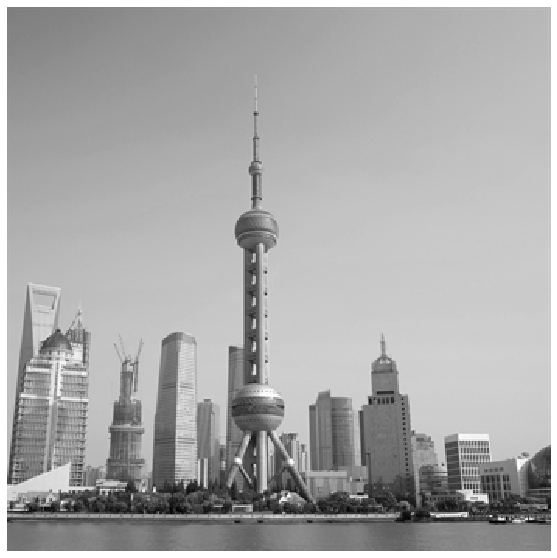

In [106]:
img = load_img('oriental_pearl.jpg')
show_img(img, color="bw")

## Sobel Edge Detection
### Vertical and Hotizontal Edges

In [107]:
def norm(ar):
    return 255. * np.absolute(ar) / np.max(ar)

### Homemade

In [108]:
vert_kernel = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

horr_kernel = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

vert_edges = sg.convolve(vert_kernel, img, 'valid')
horr_edges = sg.convolve(horr_kernel, img, 'valid')
magnitude = np.sqrt(vert_edges**2 + horr_edges**2)

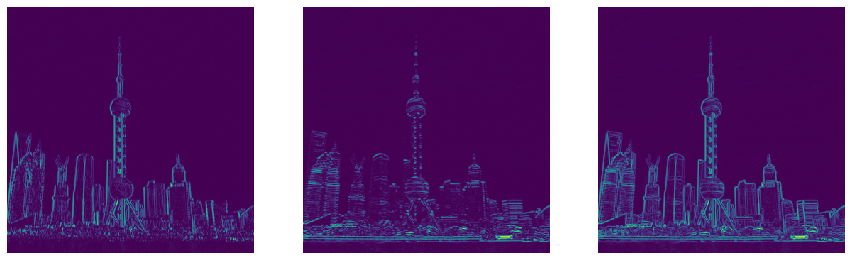

In [109]:
responses = [vert_edges, horr_edges, magnitude]

_, frames = plt.subplots(1,3, figsize=(15,15))
for frame in frames:
    response = responses.pop(0)
    frame.imshow(norm(response))
    frame.axis('off')


### Using scipy filters

In [110]:
vert_edges = np.zeros(img.shape)
filters.sobel(img, 1, vert_edges)

horr_edges = np.zeros(img.shape)
filters.sobel(img, 0, horr_edges)

magnitude = np.sqrt(vert_edges**2 + horr_edges**2)

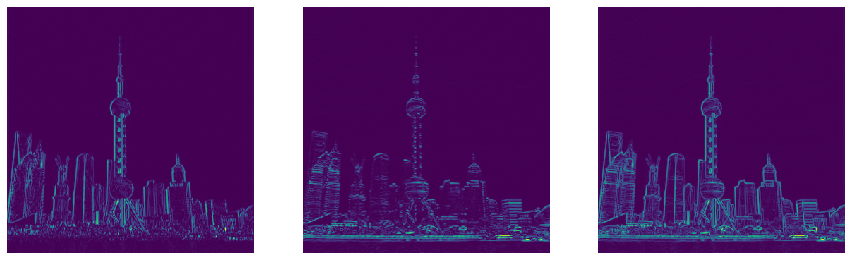

In [111]:
responses = [vert_edges, horr_edges, magnitude]

_, frames = plt.subplots(1,3, figsize=(15,15))
for frame in frames:
    response = responses.pop(0)
    frame.imshow(norm(response))
    frame.axis('off')

### usering the first deriative of the normal distribution

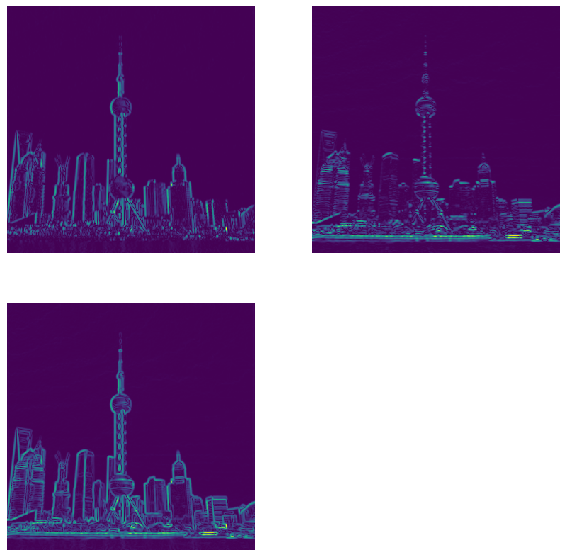

In [149]:
sigma = 1

vert_edges = np.zeros(img.shape)
horr_edges = np.zeros(img.shape)

filters.gaussian_filter(img, (sigma, sigma), (0,1), vert_edges)
filters.gaussian_filter(img, (sigma, sigma), (1,0), horr_edges)
magnitude = np.sqrt(vert_edges**2+horr_edges**2)

show_img(norm(vert_edges), norm(horr_edges), magnitude)

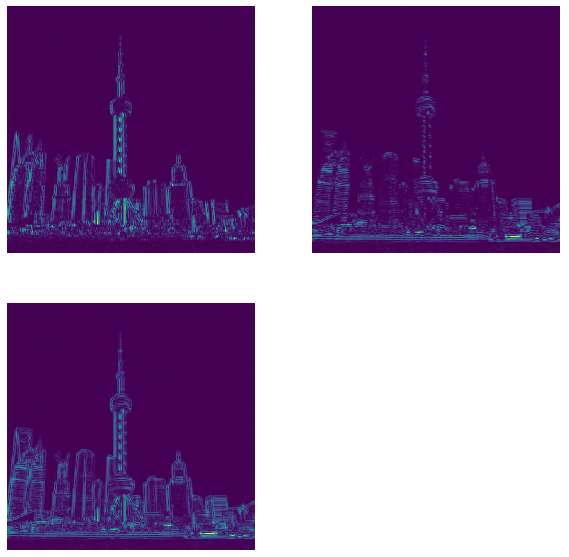

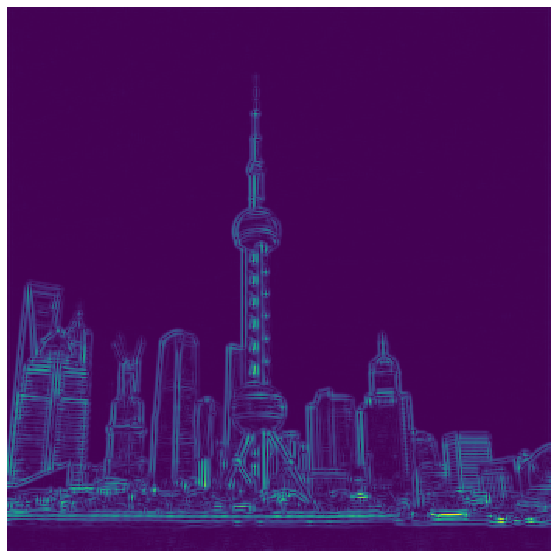

In [159]:
sigma = 1

vert_edges = np.zeros(img.shape)
horr_edges = np.zeros(img.shape)

filters.gaussian_filter(img, (sigma, sigma), (0,2), vert_edges)
filters.gaussian_filter(img, (sigma, sigma), (2,0), horr_edges)
magnitude = np.sqrt(vert_edges**2+horr_edges**2)

show_img(norm(vert_edges), norm(horr_edges), magnitude)
show_img(magnitude)

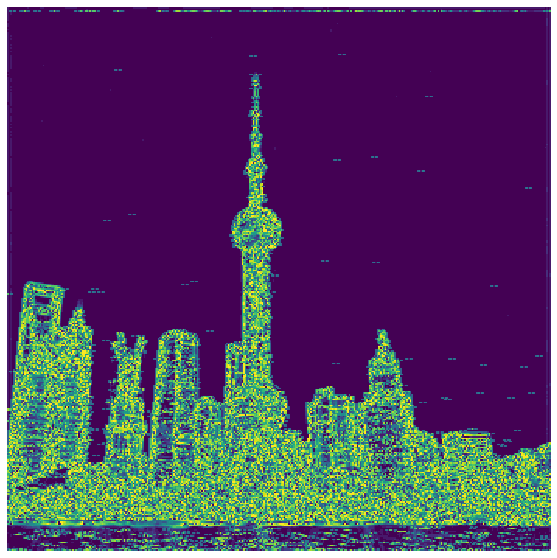

In [147]:
response = gaussian_gradient_magnitude(img, sigma=0.8)
show_img(response)

### Laplace edge detecion

$$ g =
\begin{bmatrix}
0 &  \ \ 1 & 0 \\
1 & -4 & 1 \\
0 &  \ \ 1 & 0
\end{bmatrix}
$$

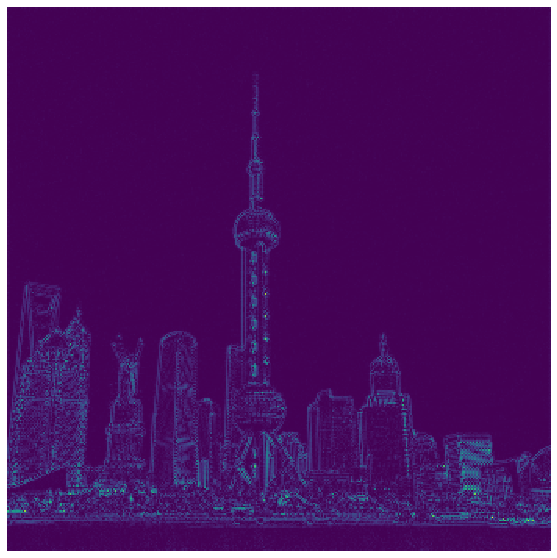

In [155]:
lapl = np.array([[0,1,0],
                 [1,-4,1],
                 [0,1,0]])

lapl_img = sg.convolve(lapl, img, 'valid')

show_img(norm(lapl_img), size=(10,10))

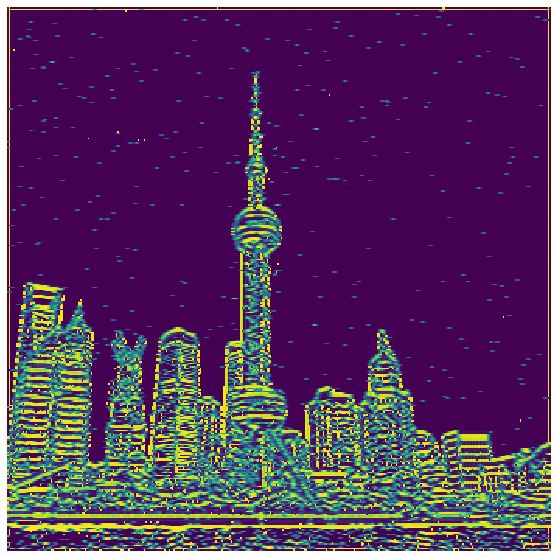

In [126]:
response = gaussian_laplace(img, sigma=0.9, mode='reflect')
show_img(response)

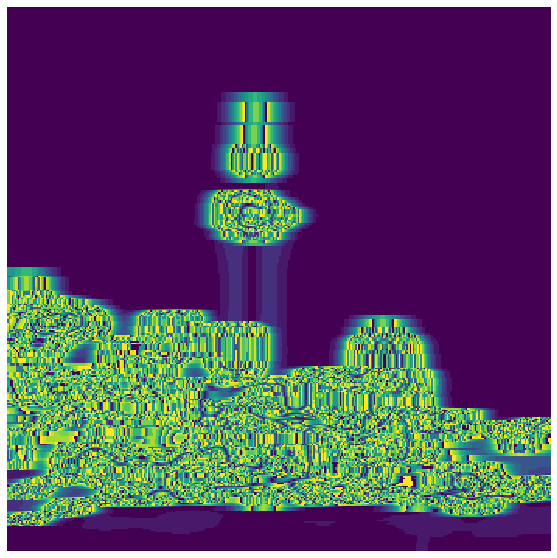

## Canny Edge Detector

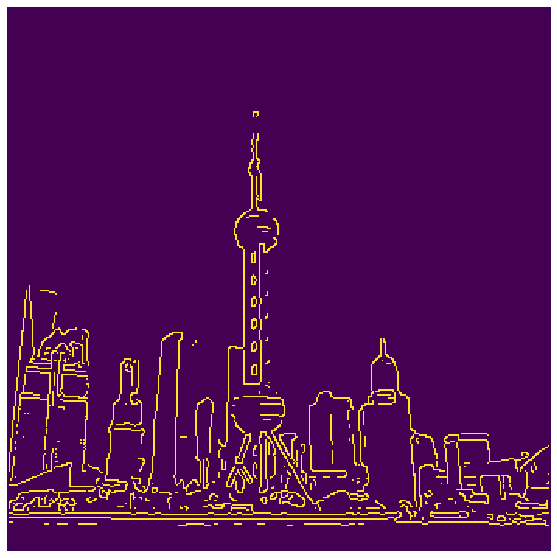

In [117]:
from skimage import feature
edges = feature.canny(img, 1, low_threshold=95, high_threshold=0, use_quantiles=False)
show_img(edges)
